In [3]:
import pandas as pd
import numpy as np
import json
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [4]:
business_df = pd.read_json('yelp_business.json',lines=True)

In [5]:
coffee_df = business_df[business_df['categories'].str.contains('Coffee')==True]

In [6]:
def get_has_tv(d):
    if type(d) == dict:
        if 'HasTV' in d.keys():
            if 'None' in d['HasTV']:
                return False
            if 'False' in d['HasTV']:
                return False
            if 'True' in d['HasTV']:
                return True
    return 'Unknown'

In [7]:
coffee_df['has_tv']=coffee_df['attributes'].apply(get_has_tv)

In [8]:
coffee_df= coffee_df[~(coffee_df['has_tv']=='Unknown')]

In [9]:
coffee_df['has_tv'].unique()

array([False, True], dtype=object)

In [10]:
coffee_df['has_tv']=coffee_df['has_tv'].astype(bool)

In [11]:
def get_price_range(d):
    if type(d) == dict:
        if 'RestaurantsPriceRange2' in d.keys():
            '''if d['RestaurantsPriceRange2'] == '1':
                return '$'
            if d['RestaurantsPriceRange2'] == '2':
                return '$$'
            if d['RestaurantsPriceRange2'] == '3':
                return '$$$'
            if d['RestaurantsPriceRange2'] == '4':
                return '$$$$'
            if d['RestaurantsPriceRange2'] == '5':
                return '$$$$$'''
            return d['RestaurantsPriceRange2']
            
    return 'Unknown'
    

In [12]:
coffee_df['price_range']=coffee_df['attributes'].apply(get_price_range)

In [13]:
coffee_df['price_range'] = np.where((coffee_df.price_range == 'None'),'Unknown',coffee_df.price_range)

In [14]:
coffee_df['price_range'].unique()

array(['2', '1', 'Unknown', '3', '4'], dtype=object)

In [15]:
coffee_df= coffee_df[~(coffee_df['price_range']=='Unknown')]

In [16]:
coffee_df['price_range'].unique()

array(['2', '1', '3', '4'], dtype=object)

In [17]:
coffee_df['price_range']=coffee_df['price_range'].astype(int)

In [18]:
coffee_df['price_range'].unique()

array([2, 1, 3, 4])

In [19]:
def get_wifi(d):
    if type(d) == dict:
        if 'WiFi' in d.keys():
            #return d['WiFi']
            if 'free' in d['WiFi']:
                return 2
            if 'paid' in d['WiFi']:
                return 1
            if 'no' in d['WiFi']:
                return 0
            if 'None' in d['WiFi']:
                return 0
    return 'Unknown'

In [20]:
coffee_df['wifi']=coffee_df['attributes'].apply(get_wifi)

In [21]:
coffee_df['wifi'].unique()

array([2, 0, 'Unknown', 1], dtype=object)

In [22]:
coffee_df= coffee_df[~(coffee_df['wifi']=='Unknown')]

In [23]:
coffee_df['wifi']=coffee_df['wifi'].astype(int)

In [24]:
coffee_df['wifi'].unique()

array([2, 0, 1])

In [25]:
def get_outdoor_seating(d):
    if type(d) == dict:
        if 'OutdoorSeating' in d.keys():
            if 'True' in d['OutdoorSeating']:
                return True
            if 'False' in d['OutdoorSeating']:
                return False
            if 'None' in d['OutdoorSeating']:
                return False
    return 'Unknown'

In [26]:
coffee_df['outdoor_seating']=coffee_df['attributes'].apply(get_outdoor_seating)

In [27]:
coffee_df= coffee_df[~(coffee_df['outdoor_seating']=='Unknown')]

In [28]:
coffee_df['outdoor_seating'].unique()

array([False, True], dtype=object)

In [29]:
coffee_df['outdoor_seating']=coffee_df['outdoor_seating'].astype(bool)

In [30]:
coffee_df['outdoor_seating'].unique()

array([False,  True])

In [31]:
coffee_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,has_tv,price_range,wifi,outdoor_seating
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",False,2,2,False
46,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,10303 108 Street NW,Edmonton,AB,T5J 1L7,53.544682,-113.506589,4.0,12,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Arts & Entertainment, Music Venues, Internet S...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",False,2,2,False
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,TN,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",False,2,2,True
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,AB,T5H 3B2,53.549633,-113.508780,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...",False,1,2,False
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,1,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150169,izSgTrqebu8bN8ONOCs6cQ,Oat Bakery,5 W Haley St,Santa Barbara,CA,93101,34.416548,-119.695626,5.0,123,1,"{'Alcohol': 'u'none'', 'HasTV': 'False', 'Bike...","Bakeries, Vegan, Specialty Food, Food Delivery...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '...",False,1,0,False
150254,Ld3qgGua7MqrFnZY8AIo0A,Café Ventana,3919 W Pine Blvd,Saint Louis,MO,63108,38.638030,-90.242133,3.5,290,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Food, Breakfast & Brunch, Cajun/Creole, Restau...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False,2,2,True
150261,Y0TWCjiiXlFi2XO2cFrUzQ,Connexxions Cafe,12644 137 Avenue NW,Edmonton,AB,T5L 4Y5,53.600573,-113.540273,4.5,13,0,"{'RestaurantsReservations': 'True', 'Alcohol':...","Hobby Shops, Tabletop Games, Coffee & Tea, Foo...",None,True,2,2,False
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'...",True,2,2,True


In [32]:
pearsoncorr = coffee_df.corr(method='pearson')
pearsoncorr

,latitude,longitude,stars,review_count,is_open,has_tv,price_range,wifi,outdoor_seating
latitude,1.000000,-0.226920,-0.033095,-0.100232,-0.025998,-0.012791,0.011368,0.009496,-0.101633
longitude,-0.226920,1.000000,0.001544,-0.007069,-0.022653,0.033534,-0.057370,0.054452,-0.057491
stars,-0.033095,0.001544,1.000000,0.227293,-0.209463,-0.415123,0.305046,-0.144131,0.325320
review_count,-0.100232,-0.007069,0.227293,1.000000,0.088427,-0.142509,0.256771,-0.164072,0.115637
is_open,-0.025998,-0.022653,-0.209463,0.088427,1.000000,0.250560,-0.056616,0.074997,-0.148654
has_tv,-0.012791,0.033534,-0.415123,-0.142509,0.250560,1.000000,-0.177371,0.155046,-0.209808
price_range,0.011368,-0.057370,0.305046,0.256771,-0.056616,-0.177371,1.000000,-0.101209,0.184070
wifi,0.009496,0.054452,-0.144131,-0.164072,0.074997,0.155046,-0.101209,1.000000,0.047236
outdoor_seating,-0.101633,-0.057491,0.325320,0.115637,-0.148654,-0.209808,0.184070,0.047236,1.000000


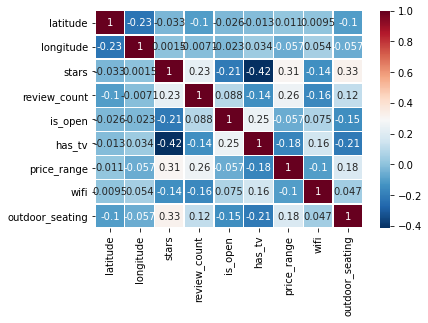

In [33]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [34]:
coffee_df_2 = coffee_df[~(coffee_df['hours'].astype(str) == 'None')]

In [35]:
hours_df = coffee_df_2['hours'].apply(pd.Series)

In [36]:
coffee_df_2=pd.merge(coffee_df_2, hours_df, left_index=True, right_index=True)

In [37]:
del coffee_df_2['hours']

In [38]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
coffee_df_2[weekdays]=coffee_df_2[weekdays].fillna('Closed')

In [39]:
def num_closed_days(row):
    tot = 0
    for i in weekdays:
        if row[i] == 'Closed':
            tot = tot+1
    return tot
coffee_df_2['days_closed'] = coffee_df_2.apply(num_closed_days,axis=1)


In [40]:
coffee_df_2['days_closed'].unique()

array([0, 1, 2, 3, 4, 6, 5])

In [41]:
def num_24_hour_days(row):
    tot = 0
    for i in weekdays:
        if row[i] == '0:0-0:0':
            tot = tot+1
    return tot

coffee_df_2['24_hour_days'] = coffee_df_2.apply(num_24_hour_days,axis=1)

In [42]:
coffee_df_2['24_hour_days'].unique()

array([0, 1, 7, 2, 3, 4, 6])

In [43]:
pearsoncorr = coffee_df_2.corr(method='pearson')
pearsoncorr

,latitude,longitude,stars,review_count,is_open,has_tv,price_range,wifi,outdoor_seating,days_closed,24_hour_days
latitude,1.000000,-0.201357,-0.018391,-0.094196,-0.034971,-0.027290,0.022793,0.014760,-0.080799,-0.026404,-0.079653
longitude,-0.201357,1.000000,0.000400,-0.011411,-0.017551,0.045116,-0.062915,0.061380,-0.067792,0.013124,0.077831
stars,-0.018391,0.000400,1.000000,0.229382,-0.206468,-0.427668,0.309827,-0.152285,0.329335,0.286574,-0.451210
review_count,-0.094196,-0.011411,0.229382,1.000000,0.082001,-0.145707,0.260790,-0.174528,0.113110,-0.009053,-0.131429
is_open,-0.034971,-0.017551,-0.206468,0.082001,1.000000,0.237557,-0.054737,0.057841,-0.147669,-0.203331,0.237667
has_tv,-0.027290,0.045116,-0.427668,-0.145707,0.237557,1.000000,-0.185202,0.153410,-0.208840,-0.137733,0.267907
price_range,0.022793,-0.062915,0.309827,0.260790,-0.054737,-0.185202,1.000000,-0.106729,0.178831,0.132373,-0.225953
wifi,0.014760,0.061380,-0.152285,-0.174528,0.057841,0.153410,-0.106729,1.000000,0.048173,-0.091380,0.121443
outdoor_seating,-0.080799,-0.067792,0.329335,0.113110,-0.147669,-0.208840,0.178831,0.048173,1.000000,0.082986,-0.296890
days_closed,-0.026404,0.013124,0.286574,-0.009053,-0.203331,-0.137733,0.132373,-0.091380,0.082986,1.000000,-0.177118


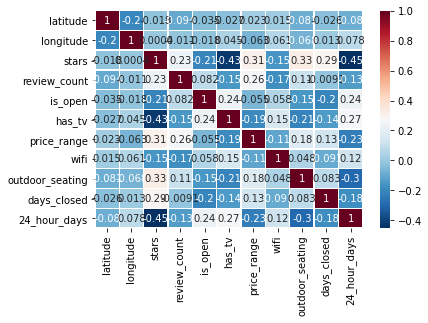

In [44]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [45]:
coffee_df_3=coffee_df_2[['stars','review_count','has_tv','price_range','wifi','outdoor_seating','days_closed','24_hour_days']]

In [46]:
pearsoncorr = coffee_df_3.corr(method='pearson')
pearsoncorr

,stars,review_count,has_tv,price_range,wifi,outdoor_seating,days_closed,24_hour_days
stars,1.000000,0.229382,-0.427668,0.309827,-0.152285,0.329335,0.286574,-0.451210
review_count,0.229382,1.000000,-0.145707,0.260790,-0.174528,0.113110,-0.009053,-0.131429
has_tv,-0.427668,-0.145707,1.000000,-0.185202,0.153410,-0.208840,-0.137733,0.267907
price_range,0.309827,0.260790,-0.185202,1.000000,-0.106729,0.178831,0.132373,-0.225953
wifi,-0.152285,-0.174528,0.153410,-0.106729,1.000000,0.048173,-0.091380,0.121443
outdoor_seating,0.329335,0.113110,-0.208840,0.178831,0.048173,1.000000,0.082986,-0.296890
days_closed,0.286574,-0.009053,-0.137733,0.132373,-0.091380,0.082986,1.000000,-0.177118
24_hour_days,-0.451210,-0.131429,0.267907,-0.225953,0.121443,-0.296890,-0.177118,1.000000


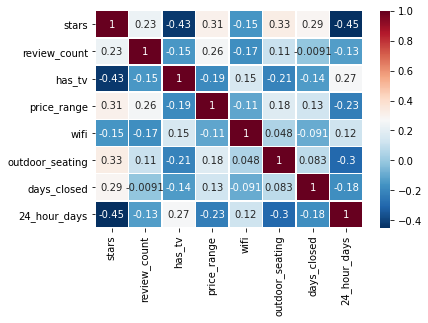

In [47]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)